In [4]:
import numpy as np
import pandas as pd

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


stop_words = stopwords.words()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import pandas as pd

input_file = "/content/IMDB_Dataset.csv"
output_file = "/content/IMDB_Dataset_cleaned.csv"

with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8') as outfile:
    for line in infile:
        if line.count('"') % 2 == 0:
            outfile.write(line)

try:
    df = pd.read_csv(output_file, engine='python')
    print(df.head())
except pd.errors.ParserError as e:
    print(f"Error parsing cleaned file: {e}")


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2417 entries, 0 to 2416
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     2417 non-null   object
 1   sentiment  2417 non-null   object
dtypes: object(2)
memory usage: 37.9+ KB


In [8]:
df.describe().T

,count,unique,top,freq
review,2417,2417,One of the other reviewers has mentioned that ...,1
sentiment,2417,2,positive,1226


In [9]:
df['sentiment'].value_counts()

sentiment
positive    1226
negative    1191
Name: count, dtype: int64

In [10]:
df['review'].str.len()

0       1761
1        998
2        926
3        748
4       1317
        ... 
2412    1689
2413    1356
2414     760
2415     823
2416     663
Name: review, Length: 2417, dtype: int64

The dataset set is balanced. Next, We’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the movie's review.

<Axes: >

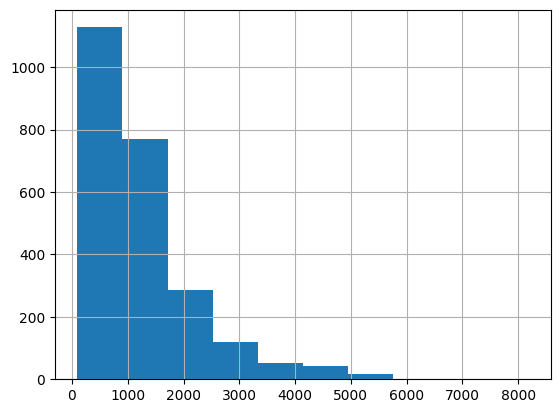

In [11]:
df['review'].str.len().hist()


The histogram shows that reviews range from 10 to 14000 characters and generally, it is between 10 to 1500 characters.

Now, we will move on the histogram for positive review and negative review respectively. Let's plot!

Text(0.5, 1.0, 'Negative Reviews')

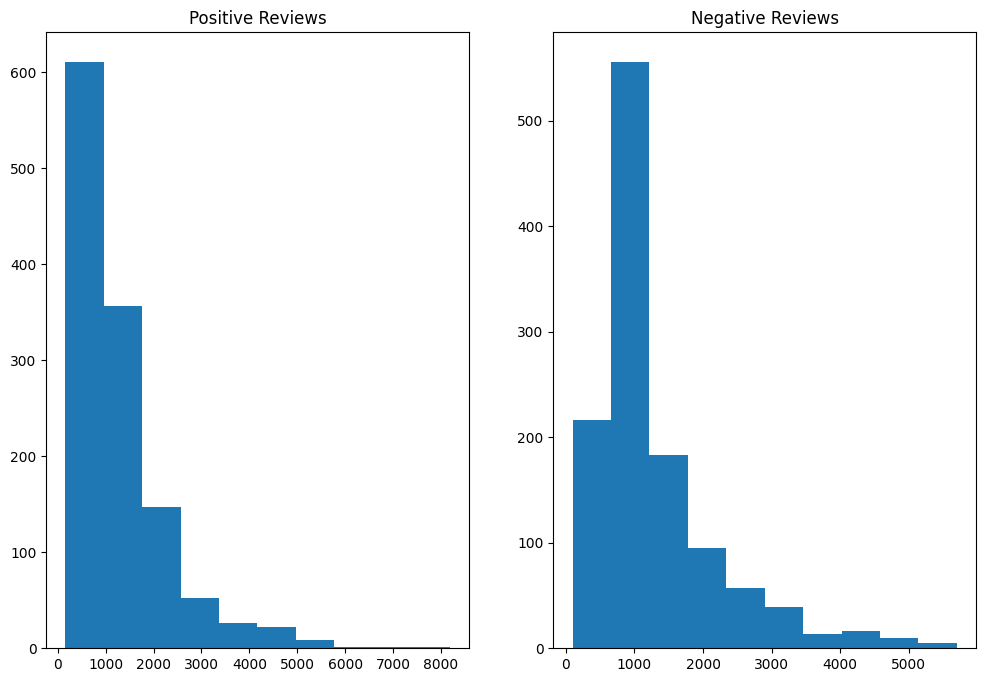

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(df[df['sentiment']=='positive']['review'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(df[df['sentiment']=='negative']['review'].str.len())
ax2.set_title( 'Negative Reviews')

we can observe some insights from the graph above:
- In general, people comment less word in the positive review to compare with negative review
- However the range of word for positive review are bigger than the range of negative review. It means in some cases, people give a long comments for excellent movies and people could less critise for bad movies

Before we move on to the next section: data preprocessing to clean the text data, we will make a wordcloud graph to show the most used words in large font and the least used words in small font in positive review and negative review

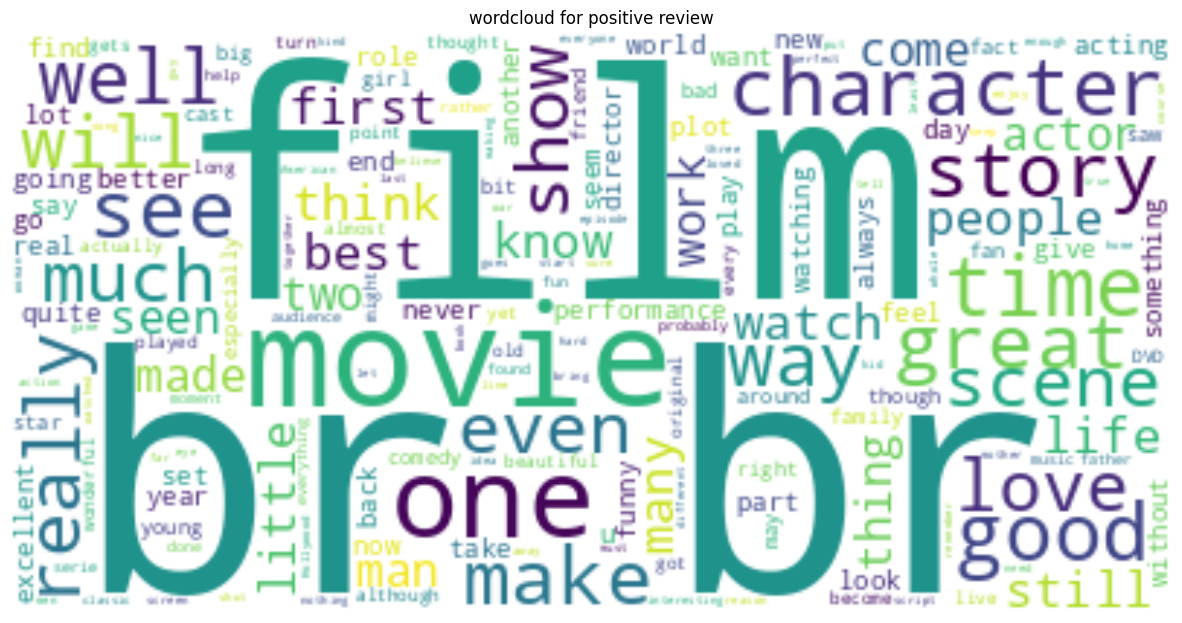

In [13]:
text = " ".join(i for i in df[df['sentiment']=='positive']['review'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

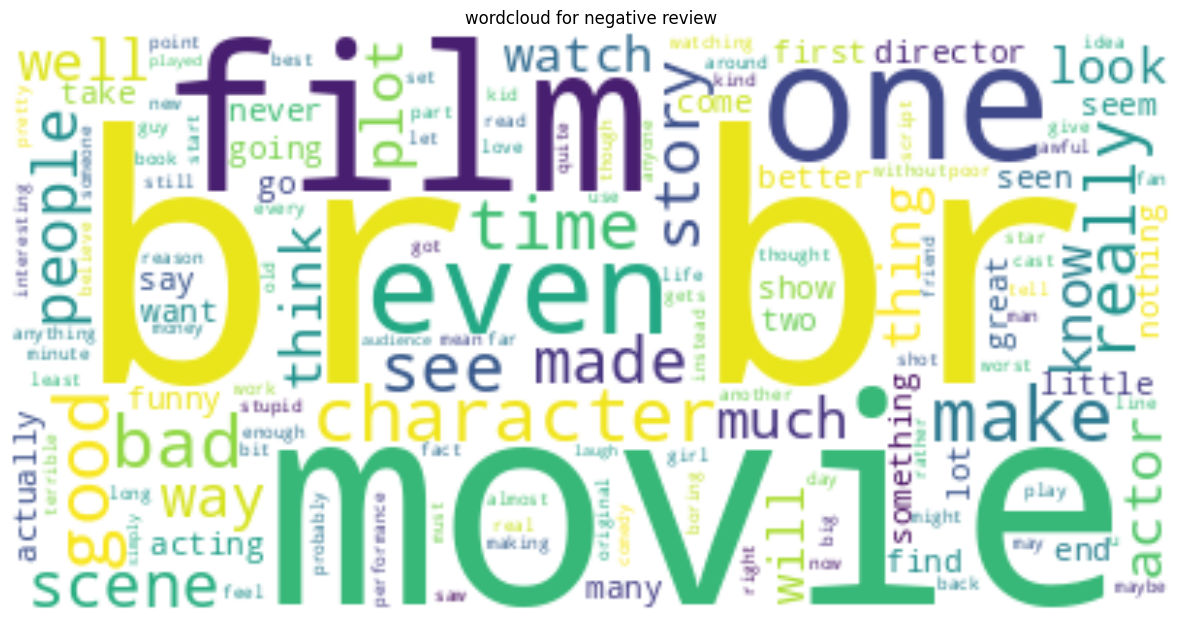

In [14]:
text = " ".join(i for i in df[df['sentiment']=='negative']['review'])
wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for negative review')
plt.show()

The wordcloud graphs in both negative and postitive comments don't show meaningful result.That's is the reason why text preprosessing is needed.

In [15]:
df.rename(columns={'review':'text'}, inplace = True)
df

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
2412,I will admit I didn't pay full attention to ev...,negative
2413,From all the bad comments about this movie and...,negative
2414,"Eh. This is a popcorn movie, nothing more. I w...",negative
2415,To say I was disappointed is an understatement...,negative


  Text Cleaning : Converting to lowercase, removing URL links, removing numbers, special characters, punctuations, newlines , emoji, removing short forms

In [16]:
import re
import string

def cleaning(text):
    text = text.lower() # lowercase
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # URL links
    text = re.sub(r"\b\d+\b", "", text) # numbers
    text = re.sub(r'<.*?>+', '', text) # special characters
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub(r'\n', '', text) # newlines
    text = re.sub(r'[’“”…]', '', text) # special characters

    # emoji
    emoji_pattern = re.compile(r"["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # short forms
    text = re.sub(r"isn't", 'is not', text)
    text = re.sub(r"he's", 'he is', text)
    text = re.sub(r"wasn't", 'was not', text)
    text = re.sub(r"there's", 'there is', text)
    text = re.sub(r"couldn't", 'could not', text)
    text = re.sub(r"won't", 'will not', text)
    text = re.sub(r"they're", 'they are', text)
    text = re.sub(r"she's", 'she is', text)
    text = re.sub(r"There's", 'there is', text)
    text = re.sub(r"wouldn't", 'would not', text)
    text = re.sub(r"haven't", 'have not', text)
    text = re.sub(r"That's", 'That is', text)
    text = re.sub(r"you've", 'you have', text)
    text = re.sub(r"He's", 'He is', text)
    text = re.sub(r"what's", 'what is', text)
    text = re.sub(r"weren't", 'were not', text)
    text = re.sub(r"we're", 'we are', text)
    text = re.sub(r"hasn't", 'has not', text)
    text = re.sub(r"you'd", 'you would', text)
    text = re.sub(r"shouldn't", 'should not', text)
    text = re.sub(r"let's", 'let us', text)
    text = re.sub(r"they've", 'they have', text)
    text = re.sub(r"You'll", 'You will', text)
    text = re.sub(r"i'm", 'i am', text)
    text = re.sub(r"we've", 'we have', text)
    text = re.sub(r"it's", 'it is', text)
    text = re.sub(r"don't", 'do not', text)
    text = re.sub(r"that´s", 'that is', text)
    text = re.sub(r"I´m", 'I am', text)
    text = re.sub(r"it’s", 'it is', text)
    text = re.sub(r"she´s", 'she is', text)
    text = re.sub(r"he’s'", 'he is', text)
    text = re.sub(r'I’m', 'I am', text)
    text = re.sub(r'I’d', 'I did', text)
    text = re.sub(r"he’s'", 'he is', text)
    text = re.sub(r'there’s', 'there is', text)

    return text
dt = df['text'].apply(cleaning)


In [17]:
df['sentiment']

0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
2412    negative
2413    negative
2414    negative
2415    negative
2416    positive
Name: sentiment, Length: 2417, dtype: object

In [18]:
dt = pd.DataFrame(dt)
dt['sentiment']=df['sentiment']
dt

,text,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
2412,i will admit i didnt pay full attention to eve...,negative
2413,from all the bad comments about this movie and...,negative
2414,eh this is a popcorn movie nothing more i watc...,negative
2415,to say i was disappointed is an understatement...,negative


Removing stop words

In [19]:
dt['no_sw'] = dt['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [20]:
dt

,text,sentiment,no_sw
0,one of the other reviewers has mentioned that ...,positive,reviewers mentioned watching oz episode youll ...
1,a wonderful little production the filming tech...,positive,wonderful production filming technique unassum...
2,i thought this was a wonderful way to spend ti...,positive,wonderful spend time hot summer weekend sittin...
3,basically theres a family where a little boy j...,negative,basically family boy jake thinks zombie closet...
4,petter matteis love in the time of money is a ...,positive,petter matteis love time money visually stunni...
...,...,...,...
2412,i will admit i didnt pay full attention to eve...,negative,admit pay full attention film honest mattered ...
2413,from all the bad comments about this movie and...,negative,comments movie add feel australians weaklings ...
2414,eh this is a popcorn movie nothing more i watc...,negative,popcorn movie watched bunch friends view horro...
2415,to say i was disappointed is an understatement...,negative,disappointed understatement amateur film made ...


Working with the most frequent words

In [21]:
from collections import Counter
cnt = Counter()
for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,movie,4006
1,film,3568
2,story,1036
3,time,1021
4,great,813
5,movies,784
6,make,744
7,made,725
8,films,708
9,characters,699


In [22]:
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h',
             width=700, height=700)


Removing the most frequent words

In [23]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
dt["wo_stopfreq"] = dt["no_sw"].apply(lambda text: remove_freqwords(text))
dt.head()

,text,sentiment,no_sw,wo_stopfreq
0,one of the other reviewers has mentioned that ...,positive,reviewers mentioned watching oz episode youll ...,reviewers mentioned watching oz episode youll ...
1,a wonderful little production the filming tech...,positive,wonderful production filming technique unassum...,wonderful production filming technique unassum...
2,i thought this was a wonderful way to spend ti...,positive,wonderful spend time hot summer weekend sittin...,wonderful spend hot summer weekend sitting air...
3,basically theres a family where a little boy j...,negative,basically family boy jake thinks zombie closet...,basically family boy jake thinks zombie closet...
4,petter matteis love in the time of money is a ...,positive,petter matteis love time money visually stunni...,petter matteis love money visually stunning wa...


In [24]:
dt['no_sw'].loc[5]

'probably alltime favorite movie story selflessness sacrifice dedication noble preachy boring despite times years paul lukas performance brings tears eyes bette davis sympathetic roles delight kids grandma dressedup midgets children makes fun watch mothers slow awakening whats happening world roof believable startling dozen thumbs theyd movie'

In [25]:
dt['wo_stopfreq'].loc[5]

'probably alltime favorite selflessness sacrifice dedication noble preachy boring despite times years paul lukas performance brings tears eyes bette davis sympathetic roles delight kids grandma dressedup midgets children makes fun watch mothers slow awakening whats happening world roof believable startling dozen thumbs theyd'

Lemmatization - converting word to its base form

In [26]:
import nltk
nltk.download('wordnet')
wordnet_lem = WordNetLemmatizer()

dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].apply(wordnet_lem.lemmatize)
dt

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,sentiment,no_sw,wo_stopfreq,wo_stopfreq_lem
0,one of the other reviewers has mentioned that ...,positive,reviewers mentioned watching oz episode youll ...,reviewers mentioned watching oz episode youll ...,reviewers mentioned watching oz episode youll ...
1,a wonderful little production the filming tech...,positive,wonderful production filming technique unassum...,wonderful production filming technique unassum...,wonderful production filming technique unassum...
2,i thought this was a wonderful way to spend ti...,positive,wonderful spend time hot summer weekend sittin...,wonderful spend hot summer weekend sitting air...,wonderful spend hot summer weekend sitting air...
3,basically theres a family where a little boy j...,negative,basically family boy jake thinks zombie closet...,basically family boy jake thinks zombie closet...,basically family boy jake thinks zombie closet...
4,petter matteis love in the time of money is a ...,positive,petter matteis love time money visually stunni...,petter matteis love money visually stunning wa...,petter matteis love money visually stunning wa...
...,...,...,...,...,...
2412,i will admit i didnt pay full attention to eve...,negative,admit pay full attention film honest mattered ...,admit pay full attention honest mattered basic...,admit pay full attention honest mattered basic...
2413,from all the bad comments about this movie and...,negative,comments movie add feel australians weaklings ...,comments add feel australians weaklings instea...,comments add feel australians weaklings instea...
2414,eh this is a popcorn movie nothing more i watc...,negative,popcorn movie watched bunch friends view horro...,popcorn watched bunch friends view horror dial...,popcorn watched bunch friends view horror dial...
2415,to say i was disappointed is an understatement...,negative,disappointed understatement amateur film made ...,disappointed understatement amateur profession...,disappointed understatement amateur profession...


In [27]:
nb= dt.drop(columns=['text','no_sw', 'wo_stopfreq'])
nb.columns=['sentiment', 'review']
nb.sentiment = [0 if each == "negative" else 1 for each in nb.sentiment]
nb

,sentiment,review
0,1,reviewers mentioned watching oz episode youll ...
1,1,wonderful production filming technique unassum...
2,1,wonderful spend hot summer weekend sitting air...
3,0,basically family boy jake thinks zombie closet...
4,1,petter matteis love money visually stunning wa...
...,...,...
2412,0,admit pay full attention honest mattered basic...
2413,0,comments add feel australians weaklings instea...
2414,0,popcorn watched bunch friends view horror dial...
2415,0,disappointed understatement amateur profession...


Tokenization


In [28]:
tokenized_review=nb['review'].apply(lambda x: x.split())
tokenized_review.head(5)

0    [reviewers, mentioned, watching, oz, episode, ...
1    [wonderful, production, filming, technique, un...
2    [wonderful, spend, hot, summer, weekend, sitti...
3    [basically, family, boy, jake, thinks, zombie,...
4    [petter, matteis, love, money, visually, stunn...
Name: review, dtype: object

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(nb['review'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



Train-Test-Split

In [30]:
from sklearn.model_selection import train_test_split
X=text_counts
y=nb['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

 **Naive Bayes Modelling**

Complement NB model:

In [31]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))


ComplementNB model accuracy is 81.82%
------------------------------------------------
Confusion Matrix:
     0    1
0  202   44
1   44  194
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       246
           1       0.82      0.82      0.82       238

    accuracy                           0.82       484
   macro avg       0.82      0.82      0.82       484
weighted avg       0.82      0.82      0.82       484



Mutilnominal NB model:

In [32]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 82.02%
------------------------------------------------
Confusion Matrix:
     0    1
0  202   44
1   43  195
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       246
           1       0.82      0.82      0.82       238

    accuracy                           0.82       484
   macro avg       0.82      0.82      0.82       484
weighted avg       0.82      0.82      0.82       484



Bernoulli NB model:

In [33]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 82.85%
------------------------------------------------
Confusion Matrix:
     0    1
0  207   39
1   44  194
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       246
           1       0.83      0.82      0.82       238

    accuracy                           0.83       484
   macro avg       0.83      0.83      0.83       484
weighted avg       0.83      0.83      0.83       484



In [34]:
!pip install --upgrade scikit-learn


  Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [35]:
import sklearn
print(sklearn.__version__)


1.2.2


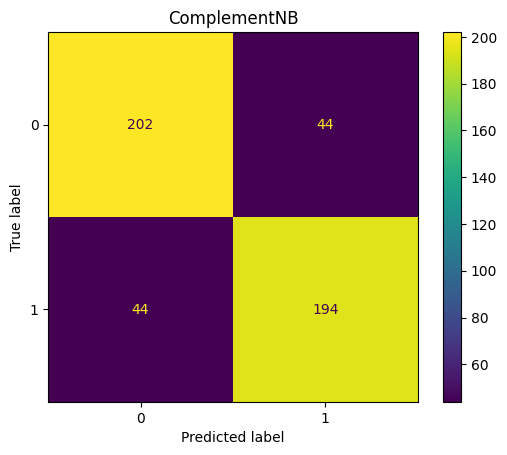

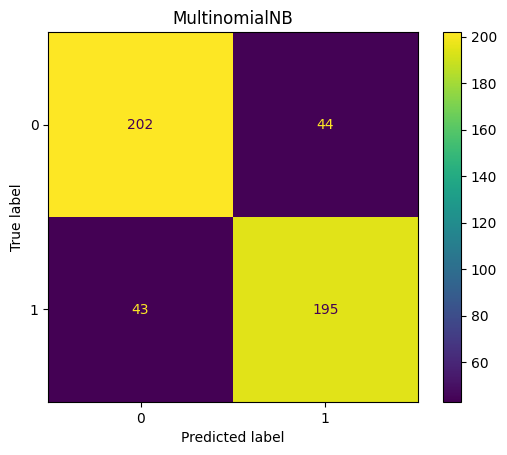

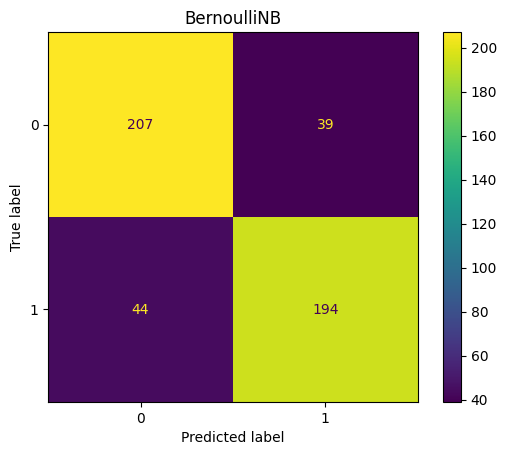

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

k = [CNB, MNB, BNB]
for model in k:
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    disp.ax_.set_title(type(model).__name__)
    plt.show()


0.8867339618774338 0.8867339618774338 0.9087073853931816


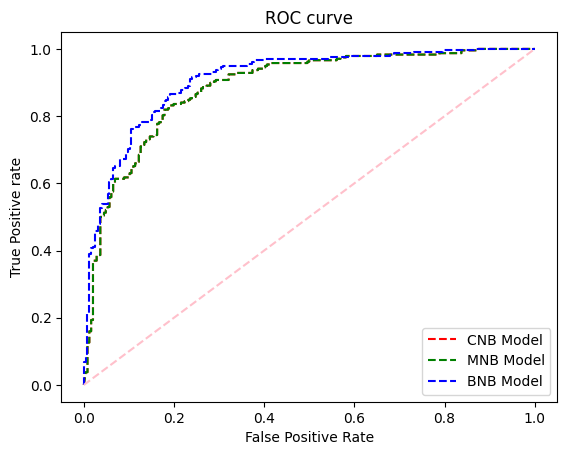

In [37]:
from sklearn.metrics import roc_curve
CNB_prob = CNB.predict_proba(X_test)
MNB_prob = MNB.predict_proba(X_test)
BNB_prob = BNB.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, CNB_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, BNB_prob[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
from sklearn.metrics import roc_auc_score
auc_CNB = roc_auc_score(y_test, CNB_prob[:,1])
auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
auc_BNB = roc_auc_score(y_test, BNB_prob[:,1])
print(auc_CNB, auc_MNB,auc_BNB)

plt.plot(fpr1, tpr1, linestyle='--',color='red', label='CNB Model')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MNB Model')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='BNB Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Trying different n-grams:


Bigram: ngram_range = (2,2)

In [38]:

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_twograms = CountVectorizer(stop_words='english',ngram_range = (2,2),tokenizer = token.tokenize)
text_counts_twograms = cv_twograms.fit_transform(nb['review'])

X_train, X_test, y_train, y_test = train_test_split(text_counts_twograms, nb['sentiment'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')

model accuracy is 67.77%


Trigram: ngram_range= (3,3)

In [39]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_threegrams = CountVectorizer(stop_words='english',ngram_range = (3,3),tokenizer = token.tokenize)
text_counts_threegrams = cv_threegrams.fit_transform(nb['review'])

X_train, X_test, y_train, y_test = train_test_split(text_counts_threegrams, nb['sentiment'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')


model accuracy is 50.83%


TF-IDF : Term Frequency-Inverse Document Frequency

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(nb['review'])

In [41]:
x_train, x_test, y_train, y_test = train_test_split(text_count_2, nb['sentiment'],test_size=0.20,random_state=30)


In [42]:
#fitting the model with MNB
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

accuracy_score_mnb = 82.23%


In [43]:
predicted_sentiments = pd.Series(MNB.predict(tfidf.transform(nb['review'])))
df['predicted_sentiment'] = predicted_sentiments.map({0: 'negative', 1: 'positive'})

In [44]:
#fitting the model with BNB
BNB.fit(x_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

accuracy_score_bnb = 83.06%


In [45]:
# fitting the model with CNB
CNB.fit(x_train, y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(x_test), y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

accuracy_score_cnb = 82.02%


In [46]:
import gensim
from gensim import corpora

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stop_words and len(token) > 3:
            result.append(token)
    return result


processed_docs = dt['wo_stopfreq'].map(preprocess)
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

print(dictionary)
print(corpus[:1])


Dictionary<32589 unique tokens: ['accustomed', 'agenda', 'agreements', 'appeal', 'audiences']...>
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 3), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 3), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 3), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 2), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), 

In [47]:
import gensim
from gensim import corpora

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stop_words and len(token) > 3:
            result.append(token)
    return result

processed_docs = dt['wo_stopfreq'].map(preprocess)
dictionary = corpora.Dictionary(processed_docs)

df_negative = dt[dt['sentiment'] == 'negative']
df_positive = dt[dt['sentiment'] == 'positive']

processed_docs_negative = df_negative['wo_stopfreq'].map(preprocess)

dictionary_negative = corpora.Dictionary(processed_docs_negative)
corpus_negative = [dictionary_negative.doc2bow(doc) for doc in processed_docs_negative]

lda_model_negative = gensim.models.LdaMulticore(corpus_negative,
                                                id2word=dictionary_negative,
                                                num_topics=10,
                                                random_state=100,
                                                chunksize=150,
                                                passes=20,
                                                per_word_topics=True)

topics_negative = lda_model_negative.print_topics(num_words=10)
for topic in topics_negative:
    print(topic)

print("LDA is not required for positive reviews.")


(0, '0.004*"jessica" + 0.003*"laurel" + 0.003*"stan" + 0.003*"mickey" + 0.003*"stephen" + 0.003*"unimaginative" + 0.002*"entertain" + 0.002*"role" + 0.002*"janet" + 0.002*"hardy"')
(1, '0.003*"cassavetes" + 0.003*"build" + 0.003*"touched" + 0.002*"damned" + 0.002*"daddy" + 0.002*"ants" + 0.002*"wars" + 0.002*"talky" + 0.002*"depression" + 0.002*"roberts"')
(2, '0.007*"plot" + 0.004*"scenes" + 0.004*"acting" + 0.004*"character" + 0.004*"watch" + 0.004*"interesting" + 0.004*"things" + 0.003*"director" + 0.003*"real" + 0.003*"watching"')
(3, '0.006*"funny" + 0.005*"original" + 0.003*"cast" + 0.003*"actors" + 0.003*"character" + 0.003*"years" + 0.003*"running" + 0.003*"find" + 0.002*"lines" + 0.002*"komodo"')
(4, '0.005*"woman" + 0.004*"cannibal" + 0.004*"david" + 0.003*"young" + 0.002*"years" + 0.002*"awards" + 0.002*"deals" + 0.002*"floor" + 0.002*"madsen" + 0.002*"diane"')
(5, '0.004*"back" + 0.003*"werewolf" + 0.003*"funny" + 0.003*"disney" + 0.003*"worst" + 0.002*"part" + 0.002*"ameri

Evaluating coherence score of the topic model

In [48]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model_negative, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda:.2f}')

Coherence Score: 0.68


In [49]:
lda_model = gensim.models.LdaMulticore(corpus,
                                       id2word=dictionary,
                                       num_topics=10,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [50]:
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.006*"match" + 0.005*"world" + 0.004*"life" + 0.004*"japanese" + 0.003*"festival" + 0.003*"crew" + 0.003*"hospital" + 0.003*"country" + 0.003*"young" + 0.003*"police"')
(1, '0.008*"emotion" + 0.006*"busy" + 0.006*"pleasure" + 0.006*"officer" + 0.005*"lacking" + 0.005*"dogs" + 0.005*"phillips" + 0.005*"connery" + 0.004*"gift" + 0.004*"crappy"')
(2, '0.010*"hardy" + 0.007*"laurel" + 0.007*"kitchen" + 0.007*"mexico" + 0.005*"gene" + 0.004*"consideration" + 0.004*"stan" + 0.004*"monk" + 0.004*"layers" + 0.003*"descent"')
(3, '0.007*"cover" + 0.006*"kelly" + 0.006*"aliens" + 0.005*"captured" + 0.005*"blonde" + 0.004*"throw" + 0.004*"born" + 0.004*"outstanding" + 0.004*"spock" + 0.004*"houston"')
(4, '0.005*"watch" + 0.005*"acting" + 0.005*"character" + 0.005*"love" + 0.005*"plot" + 0.004*"scene" + 0.004*"real" + 0.004*"show" + 0.004*"scenes" + 0.004*"actors"')
(5, '0.007*"drives" + 0.007*"amitabh" + 0.007*"continuity" + 0.005*"underrated" + 0.005*"celluloid" + 0.005*"lord" + 0.005*"sa

In [51]:
import pandas as pd

def format_topics_sentences(ldamodel, corpus, texts):
    sent_topics_df = pd.DataFrame()

    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num, topn=10)
                topic_keywords = ", ".join([word for word, prop in wp])
                row_df = pd.DataFrame([[int(topic_num), round(prop_topic, 4), topic_keywords]],
                                      columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])
                sent_topics_df = pd.concat([sent_topics_df, row_df], ignore_index=True)
            else:
                break

    contents = pd.Series(texts).reset_index(drop=True)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return sent_topics_df

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=dt['wo_stopfreq'])
df_topic_sents_keywords.head()


,Dominant_Topic,Perc_Contribution,Topic_Keywords,wo_stopfreq
0,4,0.6137,"watch, acting, character, love, plot, scene, r...",reviewers mentioned watching oz episode youll ...
1,4,0.7101,"watch, acting, character, love, plot, scene, r...",wonderful production filming technique unassum...
2,4,0.7486,"watch, acting, character, love, plot, scene, r...",wonderful spend hot summer weekend sitting air...
3,4,0.6772,"watch, acting, character, love, plot, scene, r...",basically family boy jake thinks zombie closet...
4,4,0.9213,"watch, acting, character, love, plot, scene, r...",petter matteis love money visually stunning wa...


In [52]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def extract_keywords(text, num=10):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    fdist = FreqDist(words)
    return fdist.most_common(num)

sample_text = df['text'][0]
keywords = extract_keywords(sample_text)
print(keywords)


[('oz', 6), ('br', 6), ('violence', 4), ('show', 3), ('prison', 3), ('forget', 3), ('watching', 2), ('episode', 2), ('struck', 2), ('city', 2)]


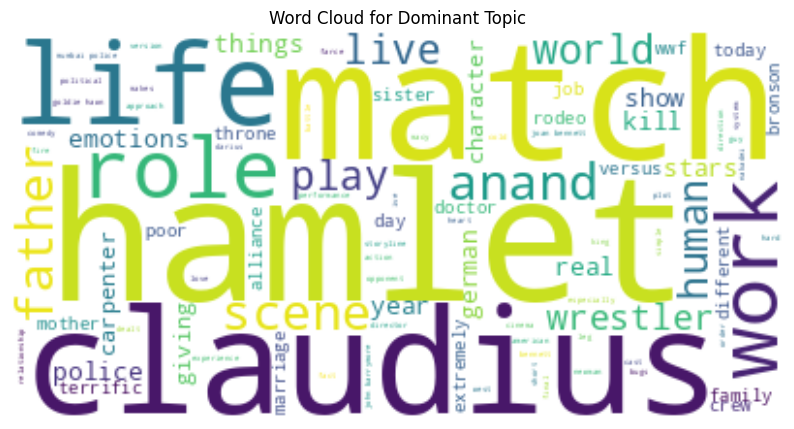

In [53]:
from wordcloud import WordCloud
dominant_topic = df_topic_sents_keywords[df_topic_sents_keywords.Dominant_Topic == 0]
text = ' '.join(dominant_topic['wo_stopfreq'])
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Dominant Topic')
plt.show()


In [54]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda:.2f}')

Coherence Score: 0.59


In [55]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

In [56]:
max_words = 20000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(dt['wo_stopfreq'])
sequences = tokenizer.texts_to_sequences(dt['wo_stopfreq'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)


In [57]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(nb['review'])
sequences = tokenizer.texts_to_sequences(nb['review'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(nb['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

y_pred_lstm = (model.predict(X_test) > 0.5).astype("int32")
accuracy_lstm = metrics.accuracy_score(y_test, y_pred_lstm)
print(f'Bidirectional LSTM Model Accuracy: {accuracy_lstm * 100:.2f}%')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, y_pred_lstm)))
print('Classification Report:')
print(classification_report(y_test, y_pred_lstm))


Epoch 1/5
25/25 [==============================] - 27s 511ms/step - loss: 0.6917 - accuracy: 0.5052 - val_loss: 0.6747 - val_accuracy: 0.6072
Epoch 2/5
25/25 [==============================] - 4s 163ms/step - loss: 0.4941 - accuracy: 0.8131 - val_loss: 0.5201 - val_accuracy: 0.7519
Epoch 3/5
25/25 [==============================] - 4s 145ms/step - loss: 0.1416 - accuracy: 0.9580 - val_loss: 0.6696 - val_accuracy: 0.7700
Epoch 4/5
25/25 [==============================] - 5s 190ms/step - loss: 0.0890 - accuracy: 0.9793 - val_loss: 0.6782 - val_accuracy: 0.7623
Epoch 5/5
16/16 [==============================] - 1s 11ms/step
Bidirectional LSTM Model Accuracy: 79.34%
Confusion Matrix:
     0    1
0  190   61
1   39  194
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       251
           1       0.76      0.83      0.80       233

    accuracy                           0.79       484
   macro avg       0.80      0.79 

In [58]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

max_words = 20000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(nb['review'])
sequences = tokenizer.texts_to_sequences(nb['review'])

seq_lengths = [len(seq) for seq in sequences]
print(f'Max sequence length: {max(seq_lengths)}')
print(f'Average sequence length: {np.mean(seq_lengths)}')
print(f'Median sequence length: {np.median(seq_lengths)}')

max_len = min(max(seq_lengths), 100)

padded_sequences = pad_sequences(sequences, maxlen=max_len)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(nb['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

y_pred_lstm = (model.predict(X_test) > 0.5).astype("int32")
accuracy_lstm = metrics.accuracy_score(y_test, y_pred_lstm)
print(f'Bidirectional LSTM Model Accuracy: {accuracy_lstm * 100:.2f}%')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, y_pred_lstm)))
print('Classification Report:')
print(classification_report(y_test, y_pred_lstm))


Max sequence length: 425
Average sequence length: 78.22672734795201
Median sequence length: 56.0
Epoch 1/5
25/25 [==============================] - 14s 333ms/step - loss: 0.6932 - accuracy: 0.5265 - val_loss: 0.6906 - val_accuracy: 0.4806
Epoch 2/5
25/25 [==============================] - 5s 185ms/step - loss: 0.5421 - accuracy: 0.7975 - val_loss: 0.6060 - val_accuracy: 0.7132
Epoch 3/5
25/25 [==============================] - 5s 203ms/step - loss: 0.1060 - accuracy: 0.9709 - val_loss: 0.6921 - val_accuracy: 0.7235
Epoch 4/5
25/25 [==============================] - 4s 157ms/step - loss: 0.0316 - accuracy: 0.9942 - val_loss: 1.1024 - val_accuracy: 0.7261
Epoch 5/5
16/16 [==============================] - 2s 13ms/step
Bidirectional LSTM Model Accuracy: 76.24%
Confusion Matrix:
     0    1
0  209   42
1   73  160
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       251
           1       0.79      0.69      0.74   

In [59]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

max_words = 20000
max_len = 150
embedding_dim = 128
lstm_units = 32
dropout_rate = 0.2

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(nb['review'])
sequences = tokenizer.texts_to_sequences(nb['review'])

seq_lengths = [len(seq) for seq in sequences]
print(f'Max sequence length: {max(seq_lengths)}')
print(f'Average sequence length: {np.mean(seq_lengths)}')
print(f'Median sequence length: {np.median(seq_lengths)}')

max_len = min(max(seq_lengths), max_len)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(nb['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
model.add(Dropout(dropout_rate))
model.add(Bidirectional(LSTM(lstm_units)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

y_pred_lstm = (model.predict(X_test) > 0.5).astype("int32")
accuracy_lstm = metrics.accuracy_score(y_test, y_pred_lstm)
print(f'Bidirectional LSTM Model Accuracy: {accuracy_lstm * 100:.2f}%')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, y_pred_lstm)))
print('Classification Report:')
print(classification_report(y_test, y_pred_lstm))


Max sequence length: 425
Average sequence length: 78.22672734795201
Median sequence length: 56.0
Epoch 1/10
25/25 [==============================] - 12s 229ms/step - loss: 0.6906 - accuracy: 0.5304 - val_loss: 0.6739 - val_accuracy: 0.5633
Epoch 2/10
25/25 [==============================] - 3s 140ms/step - loss: 0.4688 - accuracy: 0.8409 - val_loss: 0.5233 - val_accuracy: 0.7390
Epoch 3/10
25/25 [==============================] - 3s 123ms/step - loss: 0.0945 - accuracy: 0.9858 - val_loss: 0.9408 - val_accuracy: 0.7468
Epoch 4/10
25/25 [==============================] - 3s 119ms/step - loss: 0.0092 - accuracy: 0.9994 - val_loss: 0.9472 - val_accuracy: 0.7339
Epoch 5/10
25/25 [==============================] - 4s 153ms/step - loss: 0.0063 - accuracy: 0.9974 - val_loss: 1.2141 - val_accuracy: 0.7028
Epoch 6/10
25/25 [==============================] - 3s 116ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 1.2984 - val_accuracy: 0.7054
Epoch 7/10
25/25 [==============================] 

In [60]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from gensim.corpora import Dictionary
from gensim.models import LdaModel

negative_reviews_indices = np.where(y_pred_lstm == 0)[0]
negative_reviews = nb.iloc[negative_reviews_indices]['review']
negative_sequences = tokenizer.texts_to_sequences(negative_reviews)
negative_padded_sequences = pad_sequences(negative_sequences, maxlen=max_len)
reverse_word_index = dict(map(reversed, tokenizer.word_index.items()))
negative_reviews_words = [[reverse_word_index[token] for token in seq if token in reverse_word_index] for seq in negative_sequences]
negative_dictionary = Dictionary(negative_reviews_words)
negative_corpus = [negative_dictionary.doc2bow(doc) for doc in negative_reviews_words]

num_topics = 10
lda_model = LdaModel(corpus=negative_corpus, id2word=negative_dictionary, num_topics=num_topics, random_state=300, passes=100)

print('\nTopics for Negative Reviews:')
for idx, topic in lda_model.print_topics():
    print(f'Topic: {idx}')
    print(f'Words: {topic}\n')


Topics for Negative Reviews:
Topic: 0
Words: 0.005*"watch" + 0.005*"back" + 0.004*"fonda" + 0.003*"lot" + 0.003*"scene" + 0.003*"scenes" + 0.003*"acting" + 0.003*"long" + 0.003*"interesting" + 0.003*"tv"

Topic: 1
Words: 0.005*"jimmy" + 0.005*"series" + 0.004*"love" + 0.003*"life" + 0.003*"rose" + 0.003*"fred" + 0.003*"plot" + 0.003*"character" + 0.003*"comedy" + 0.002*"find"

Topic: 2
Words: 0.004*"plot" + 0.004*"action" + 0.004*"scenes" + 0.003*"girls" + 0.003*"drink" + 0.003*"character" + 0.003*"lots" + 0.003*"watch" + 0.003*"makes" + 0.003*"book"

Topic: 3
Words: 0.004*"tom" + 0.004*"acting" + 0.003*"kane" + 0.003*"action" + 0.003*"years" + 0.003*"interesting" + 0.003*"henry" + 0.002*"love" + 0.002*"scenes" + 0.002*"particularly"

Topic: 4
Words: 0.004*"musical" + 0.004*"watching" + 0.004*"dunne" + 0.003*"plot" + 0.003*"married" + 0.003*"ive" + 0.003*"life" + 0.003*"pretty" + 0.003*"hes" + 0.003*"gay"

Topic: 5
Words: 0.010*"woman" + 0.007*"pretty" + 0.005*"police" + 0.004*"young"

In [61]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=negative_reviews_words, dictionary=negative_dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'LDA Model Coherence Score: {coherence_lda}')

LDA Model Coherence Score: 0.3609185690457998


In [70]:
!pip uninstall scikit-learn
!pip install scikit-learn


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.2.2
  Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)


**Extracting Topics from Negative Reviews using LSA ( Latent Semantic Analysis)**

In [79]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

negative_reviews_indices = np.where(y_pred_lstm == 0)[0]
negative_reviews = nb.iloc[negative_reviews_indices]['review']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(negative_reviews)
negative_sequences = tokenizer.texts_to_sequences(negative_reviews)
max_len = max(len(seq) for seq in negative_sequences)
negative_padded_sequences = pad_sequences(negative_sequences, maxlen=max_len)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(negative_reviews)

num_topics = 10
lsa_model = TruncatedSVD(n_components=num_topics, random_state=300)
lsa_topic_matrix = lsa_model.fit_transform(tfidf_matrix)

terms = tfidf_vectorizer.get_feature_names_out()

print('\nTopics for Negative Reviews:')
for idx, topic in enumerate(lsa_model.components_):
    top_terms_indices = topic.argsort()[-10:][::-1]
    top_terms = [terms[i] for i in top_terms_indices]
    print(f'Topic {idx}: {" ".join(top_terms)}\n')



Topics for Negative Reviews:
Topic 0: acting plot watch book scenes pretty life real character funny

Topic 1: series david gathering week episodes spanish hospital original television miss

Topic 2: funny watch laugh find tv series extremely boring ive interesting

Topic 3: action love scenes jackie screen padrino pure masterpiece chan glad

Topic 4: book read horror blood ive bradbury reason saras witch acting

Topic 5: heat feel theme real series adventure song wonderful life audience

Topic 6: woman pretty find laugh book start dumb friends police big

Topic 7: japanese woman knotts horror makes star pretty dull roles kid

Topic 8: world game pretty begin acting rating enjoy probably american worst

Topic 9: big killer adventure video feeling song line young zodiac simply



In [104]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from sklearn.feature_extraction.text import CountVectorizer

negative_reviews_indices = np.where(y_pred_lstm == 0)[0]
negative_reviews = nb.iloc[negative_reviews_indices]['review']

texts = [review.split() for review in negative_reviews]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(negative_reviews)

num_topics = 9
lsa_model = TruncatedSVD(n_components=num_topics, random_state= 75)
lsa_topic_matrix = lsa_model.fit_transform(X)

terms = vectorizer.get_feature_names_out()
topic_terms = []
for topic in lsa_model.components_:
    top_terms_indices = topic.argsort()[-10:][::-1]
    top_terms = [terms[i] for i in top_terms_indices]
    topic_terms.append(top_terms)

coherence_model_lsa = CoherenceModel(
    model=None,
    texts=texts,
    dictionary=dictionary,
    coherence='c_v',
    topn=2,
    topics=topic_terms
)
coherence_lsa = coherence_model_lsa.get_coherence()
print(f'LSA Model Coherence Score: {coherence_lsa}')


LSA Model Coherence Score: 0.7883134196936762
